In [1]:
!pip install findspark pyspark
!pip install pyspark
!pip install matplotlib
!pip install seaborn
!apt-get install openjdk-8-jdk-headless -qq > /dev/null



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
O sistema n�o pode encontrar o caminho especificado.


In [2]:
import findspark
import pandas as pd
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import * 
from pyspark.sql.functions import to_date, col
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

# CRIANDO SESSÃO SPARK
spark = SparkSession.builder.appName("Analise_Transporte").getOrCreate()

# LENDO ARQUIVOP CSV COM PYSPARK
df = spark.read.csv('dados_Logística_Transporte.csv', header=True, inferSchema=True)

# EXIBINDO A BASE DE DADOS COMPLETA
df.show()

+-----------+------------+--------------------+---------------+-------------+--------------------+--------------------+-----------+
|Data Início|Data Término|           Motorista|Tipo Transporte|Placa Veículo|       Cidade Origem|      Cidade Destino|     Status|
+-----------+------------+--------------------+---------------+-------------+--------------------+--------------------+-----------+
| 2025-10-23|  2025-10-27|   Sra. Nina da Mota|     Rodoviário|     KXP-6Y71|Casa Grande dos D...|       Sousa da Mata|   Entregue|
| 2025-10-17|  2025-10-25|         Thales Dias|       Marítimo|     DCR-0M42|            da Rocha|      Ferreira Verde|   Entregue|
| 2025-10-20|  2025-10-22|        Asafe Novais|          Aéreo|     DIK-0J40|             Moreira|             Barbosa|   Entregue|
| 2025-10-08|  2025-10-18|      Rebeca da Cruz|       Marítimo|     PZZ-1Q40|      Brito do Campo|           Rodrigues|Em Trânsito|
| 2025-10-20|  2025-10-27|       Bella Correia|       Marítimo|     KAV-5T40

In [6]:

#SELECIONANDO APENAS ALGUMAS COLUNAS

df.select("Motorista", "Placa Veículo").show()

+--------------------+-------------+
|           Motorista|Placa Veículo|
+--------------------+-------------+
|   Sra. Nina da Mota|     KXP-6Y71|
|         Thales Dias|     DCR-0M42|
|        Asafe Novais|     DIK-0J40|
|      Rebeca da Cruz|     PZZ-1Q40|
|       Bella Correia|     KAV-5T40|
|    Cecília Mendonça|     ABP-1V75|
|  Sra. Ágatha da Paz|     VGK-2T79|
|     Ana Laura Souza|     VUL-8D11|
|Dra. Emanuelly da...|     DQF-1U70|
|           Theo Lima|     WIN-2C75|
|     Srta. Ayla Melo|     FUD-0G13|
|      Eloah Ferreira|     XXD-3S41|
|   Sabrina Aparecida|     WYM-4D69|
|       Murilo Novais|     RUE-8U63|
|    Caroline Rezende|     AAM-5Y63|
|       Gabriel Souza|     GWS-0D05|
|Sr. José Miguel O...|     OHB-4I07|
|     Cecilia Barbosa|     QAB-5X66|
|    Maysa Nascimento|     FTG-7A87|
|    Lorenzo Nogueira|     XUU-1U92|
+--------------------+-------------+
only showing top 20 rows


In [7]:

#APLICANDO FILTROS PARTE 1. FILTRANDO STATUS DA VIAGEM 

df.filter(df["Status"] == "Entregue").show()

+-----------+------------+--------------------+---------------+-------------+--------------------+--------------------+--------+
|Data Início|Data Término|           Motorista|Tipo Transporte|Placa Veículo|       Cidade Origem|      Cidade Destino|  Status|
+-----------+------------+--------------------+---------------+-------------+--------------------+--------------------+--------+
| 2025-10-23|  2025-10-27|   Sra. Nina da Mota|     Rodoviário|     KXP-6Y71|Casa Grande dos D...|       Sousa da Mata|Entregue|
| 2025-10-17|  2025-10-25|         Thales Dias|       Marítimo|     DCR-0M42|            da Rocha|      Ferreira Verde|Entregue|
| 2025-10-20|  2025-10-22|        Asafe Novais|          Aéreo|     DIK-0J40|             Moreira|             Barbosa|Entregue|
| 2025-10-26|  2025-10-27|     Srta. Ayla Melo|     Rodoviário|     FUD-0G13|           das Neves|             Rezende|Entregue|
| 2025-10-24|  2025-10-28|    Caroline Rezende|     Rodoviário|     AAM-5Y63|              Vieira

In [8]:

#APLICANDO FILTROS PARTE 2. FILTRANDO CIDADE DE ORIGEM COMO MOREIRA DO AMPARO E TIPO DE TRANSPORTE COMO RODOVIÁRIO

df.filter((df['Cidade Origem'] == 'Moreira do Amparo') & (df['Tipo Transporte'] == 'Rodoviário')).show()

+-----------+------------+--------------------+---------------+-------------+-----------------+-----------------+--------+
|Data Início|Data Término|           Motorista|Tipo Transporte|Placa Veículo|    Cidade Origem|   Cidade Destino|  Status|
+-----------+------------+--------------------+---------------+-------------+-----------------+-----------------+--------+
| 2025-10-14|  2025-10-16|Carlos Eduardo Du...|     Rodoviário|     XHW-2N60|Moreira do Amparo|Ferreira do Norte|Entregue|
+-----------+------------+--------------------+---------------+-------------+-----------------+-----------------+--------+



In [14]:

#AGRUPANDO VALORES. CONTANDO VIAGEMS POR STATUS

df.groupBy("Status").count().show()

+-----------+-----+
|     Status|count|
+-----------+-----+
|Em Trânsito|  322|
|   Atrasado|  328|
|   Entregue|  350|
+-----------+-----+



In [9]:

# ORDENANDO BASE DE DADOS POR DATA DE INICIO

df.orderBy("Data Início").show()

+-----------+------------+--------------------+---------------+-------------+--------------------+--------------------+-----------+
|Data Início|Data Término|           Motorista|Tipo Transporte|Placa Veículo|       Cidade Origem|      Cidade Destino|     Status|
+-----------+------------+--------------------+---------------+-------------+--------------------+--------------------+-----------+
| 2025-09-29|  2025-10-06|       Gabriel Souza|     Rodoviário|     GWS-0D05|       Leão da Serra|        Cirino Verde|   Atrasado|
| 2025-09-29|  2025-10-01|Benjamim Casa Grande|       Marítimo|     WHN-9C65|               Souza|Caldeira de Vasco...|   Atrasado|
| 2025-09-29|  2025-10-02| Srta. Larissa Lopes|       Marítimo|     RBJ-8Y55|               Ramos|Cavalcanti de Vargas|   Entregue|
| 2025-09-29|  2025-10-08|         Bruna Costa|          Aéreo|     BGC-1Y36|             Pacheco|               Costa|Em Trânsito|
| 2025-09-29|  2025-09-30|          Ian Barros|          Aéreo|     WXZ-0Z45

In [16]:

#TRANSFORMANDO TIPOS DE COLUNAS

df = df.withColumn("Data Início", to_date(col("Data Início"), "dd/MM/yyyy"))
df = df.withColumn("Data Término", to_date(col("Data Término"), "dd/MM/yyyy"))

In [10]:


# ADICIONANDO UMA NOVA COLUNA
df = df.withColumn("Duração da Viagem (Em dias)", datediff(col("Data Término"), col("Data Início")))
df.show()



+-----------+------------+--------------------+---------------+-------------+--------------------+--------------------+-----------+---------------------------+
|Data Início|Data Término|           Motorista|Tipo Transporte|Placa Veículo|       Cidade Origem|      Cidade Destino|     Status|Duração da Viagem (Em dias)|
+-----------+------------+--------------------+---------------+-------------+--------------------+--------------------+-----------+---------------------------+
| 2025-10-23|  2025-10-27|   Sra. Nina da Mota|     Rodoviário|     KXP-6Y71|Casa Grande dos D...|       Sousa da Mata|   Entregue|                          4|
| 2025-10-17|  2025-10-25|         Thales Dias|       Marítimo|     DCR-0M42|            da Rocha|      Ferreira Verde|   Entregue|                          8|
| 2025-10-20|  2025-10-22|        Asafe Novais|          Aéreo|     DIK-0J40|             Moreira|             Barbosa|   Entregue|                          2|
| 2025-10-08|  2025-10-18|      Rebeca d

In [11]:

# ALTERANDO TITULOS DE COLUNAS PRA MAIUSCULO

df.select(upper(col("Motorista")).alias("MOTORISTA"), upper(col("Placa Veículo")).alias("PLACA VEÍCULO")).show()


+--------------------+-------------+
|           MOTORISTA|PLACA VEÍCULO|
+--------------------+-------------+
|   SRA. NINA DA MOTA|     KXP-6Y71|
|         THALES DIAS|     DCR-0M42|
|        ASAFE NOVAIS|     DIK-0J40|
|      REBECA DA CRUZ|     PZZ-1Q40|
|       BELLA CORREIA|     KAV-5T40|
|    CECÍLIA MENDONÇA|     ABP-1V75|
|  SRA. ÁGATHA DA PAZ|     VGK-2T79|
|     ANA LAURA SOUZA|     VUL-8D11|
|DRA. EMANUELLY DA...|     DQF-1U70|
|           THEO LIMA|     WIN-2C75|
|     SRTA. AYLA MELO|     FUD-0G13|
|      ELOAH FERREIRA|     XXD-3S41|
|   SABRINA APARECIDA|     WYM-4D69|
|       MURILO NOVAIS|     RUE-8U63|
|    CAROLINE REZENDE|     AAM-5Y63|
|       GABRIEL SOUZA|     GWS-0D05|
|SR. JOSÉ MIGUEL O...|     OHB-4I07|
|     CECILIA BARBOSA|     QAB-5X66|
|    MAYSA NASCIMENTO|     FTG-7A87|
|    LORENZO NOGUEIRA|     XUU-1U92|
+--------------------+-------------+
only showing top 20 rows


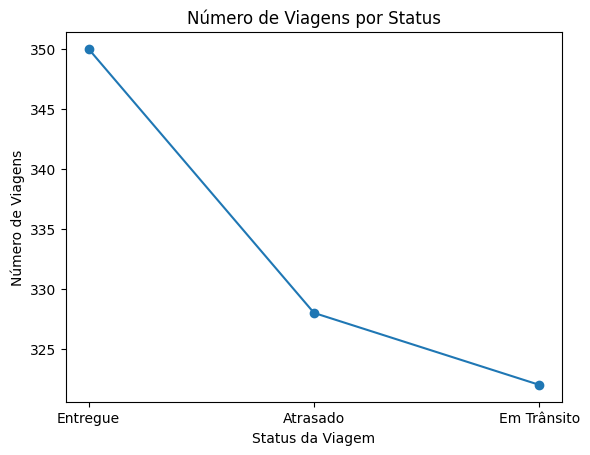

In [25]:
status_counts = df.groupBy("Status").count().orderBy("count", ascending=False).collect()

status_labels = [row['Status'] for row in status_counts]
status_values = [row['count'] for row in status_counts]

plt.plot(status_labels, status_values, marker='o')
plt.xlabel('Status da Viagem')
plt.ylabel('Número de Viagens')
plt.title('Número de Viagens por Status')
plt.show()